This notebook is EDA regarding our problem statement of predicting gamegenre dependent on gaming behaviour.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeCV, Lasso, Ridge

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
# Only for google collab for when I initalised NN
#df = pd.read_csv("/content/drive/MyDrive/Data/online_gaming_behavior_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("gaming.csv")

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
df.shape

(40034, 13)

In [5]:
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [7]:
df.Gender = np.where(df["Gender"] == "Male", 1, 0)

In [8]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,0,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,0,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,1,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,1,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [9]:
df.GameDifficulty.unique()

array(['Medium', 'Easy', 'Hard'], dtype=object)

In [11]:
df["GameDifficulty"] = df["GameDifficulty"].map({"Easy": 0, "Medium": 1, "Hard": 2})

In [13]:
df.EngagementLevel.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [15]:
df["EngagementLevel"] = df["EngagementLevel"].map({"Low": 0, "Medium": 1, "High": 2})

In [17]:
df["GameGenre"] = df["GameGenre"].map({"Strategy": 0, "Sports": 1, "Action": 2, "RPG": 3, "Simulation": 4})

In [19]:
df.Location.unique()

array(['Other', 'USA', 'Europe', 'Asia'], dtype=object)

In [21]:
df["Location"] = df["Location"].map({"Other": 0, "USA": 1, "Europe": 2, "Asia": 3})

In [23]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,0,0,16.271119,0,1,6,108,79,25,1
1,9001,29,0,1,0,5.525961,0,1,5,144,11,10,1
2,9002,22,0,1,1,8.223755,0,0,16,142,35,41,2
3,9003,35,1,1,2,5.265351,1,0,9,85,57,47,1
4,9004,33,1,2,2,15.531945,0,1,2,131,95,37,1


Made sure the data was numeric so easily parsed through code

<Axes: xlabel='GameGenre'>

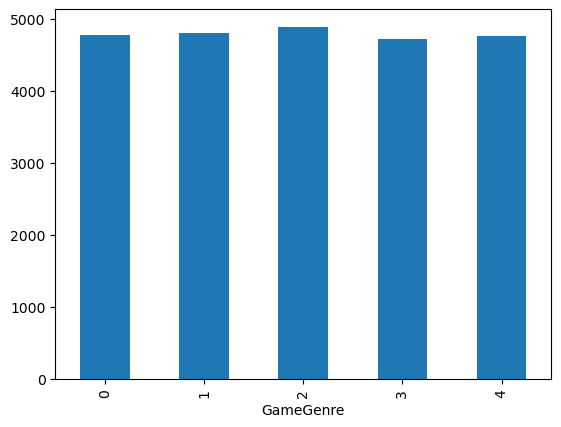

In [57]:
df.groupby("GameGenre")["Gender"].sum().plot(kind= "bar")

<Axes: xlabel='GameGenre'>

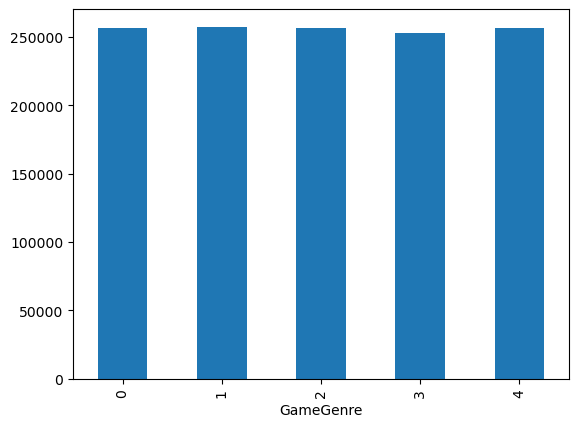

In [96]:
df.groupby("GameGenre")["Age"].sum().plot(kind= "bar")

<Axes: xlabel='Age', ylabel='AvgSessionDurationMinutes'>

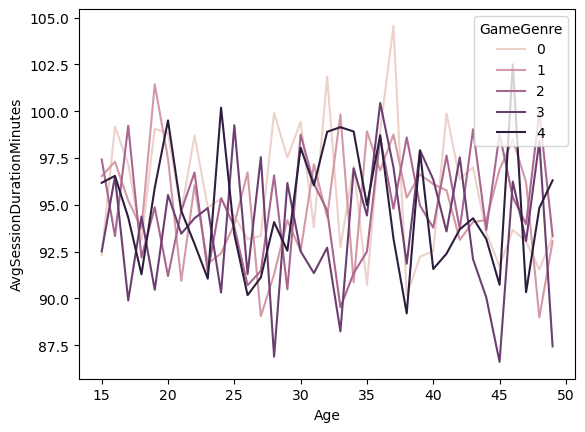

In [42]:
sns.lineplot(x= df.Age, y= df.AvgSessionDurationMinutes, hue= df.GameGenre, err_style= None)

<Axes: xlabel='Age', ylabel='PlayerLevel'>

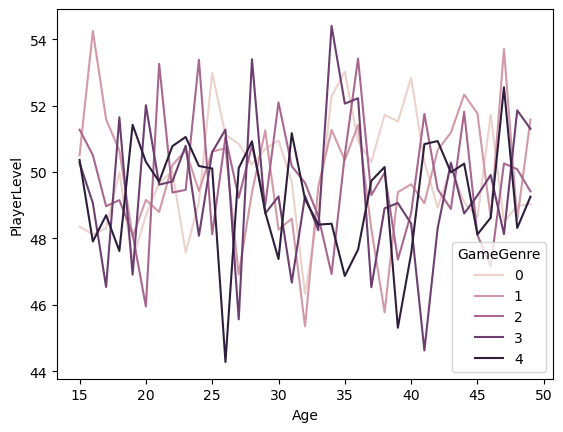

In [44]:
sns.lineplot(x= df.Age, y= df.PlayerLevel, hue= df.GameGenre, err_style= None)

<Axes: xlabel='Age', ylabel='AchievementsUnlocked'>

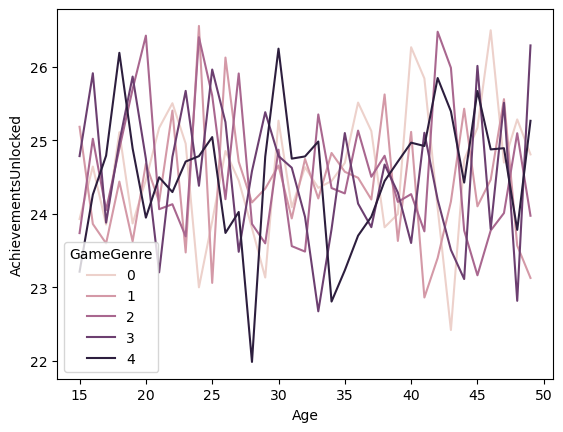

In [46]:
sns.lineplot(x= df.Age, y= df.AchievementsUnlocked, hue= df.GameGenre, err_style= None)

<Axes: xlabel='Age', ylabel='SessionsPerWeek'>

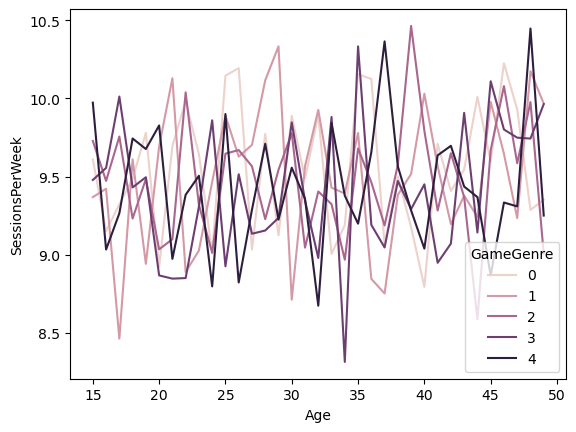

In [63]:
sns.lineplot(x= df.Age, y= df.SessionsPerWeek, hue= df.GameGenre, err_style= None)

<Axes: xlabel='Age', ylabel='GameDifficulty'>

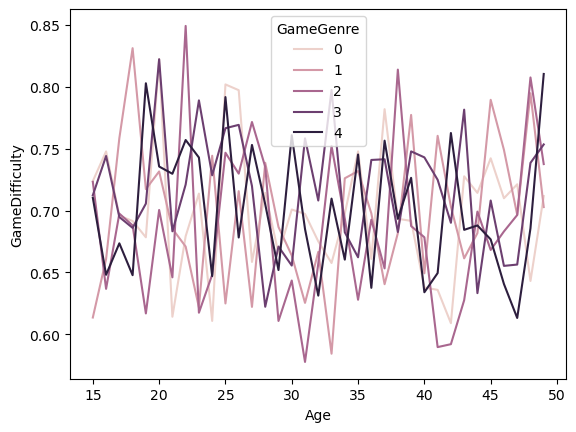

In [65]:
sns.lineplot(y= df.GameDifficulty, x= df.Age, hue= df.GameGenre, err_style= None)

In [34]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,0,0,16.271119,0,1,6,108,79,25,1
1,9001,29,0,1,0,5.525961,0,1,5,144,11,10,1
2,9002,22,0,1,1,8.223755,0,0,16,142,35,41,2
3,9003,35,1,1,2,5.265351,1,0,9,85,57,47,1
4,9004,33,1,2,2,15.531945,0,1,2,131,95,37,1


<Axes: xlabel='GameGenre'>

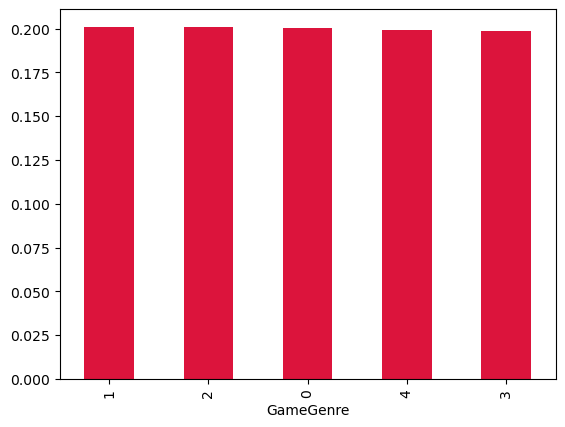

In [98]:
df.GameGenre.value_counts(normalize= True).plot(kind= "bar", color= "crimson")

<Axes: xlabel='Location'>

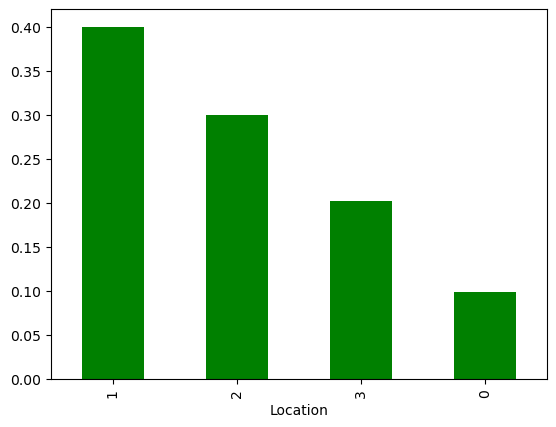

In [104]:
df.Location.value_counts(normalize= True).plot(kind= "bar", color= "green")

<Axes: xlabel='Gender'>

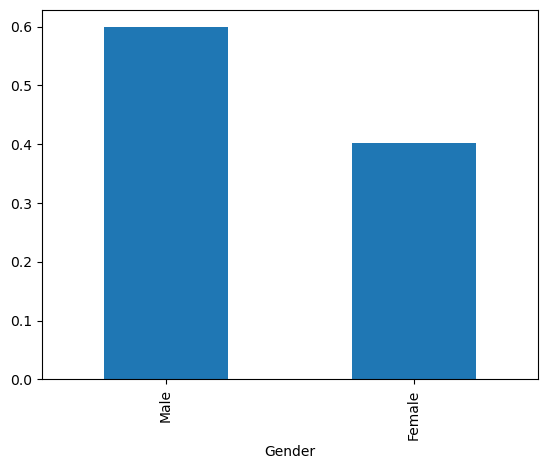

In [27]:
df.Gender.value_counts(normalize= True).plot(kind= "bar")

<Axes: xlabel='Age'>

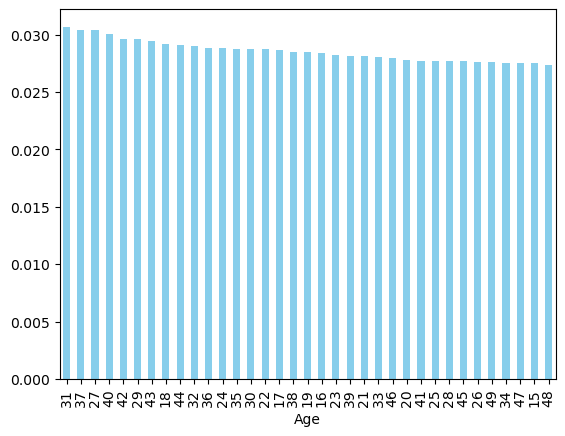

In [108]:
df.Age.value_counts(normalize= True).plot(kind= "bar", color= "skyblue")

<Axes: xlabel='PlayerLevel'>

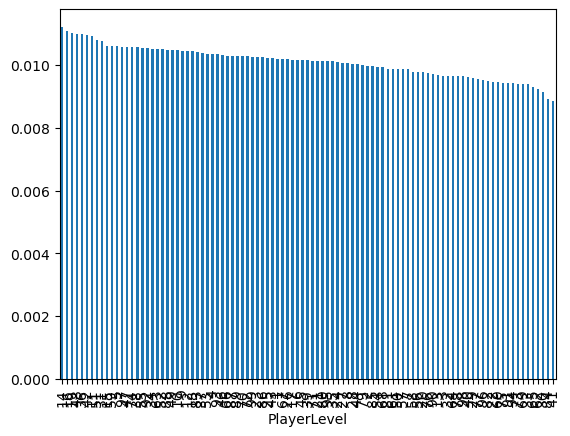

In [37]:
df.PlayerLevel.value_counts(normalize= True).plot(kind= "bar")

<Axes: xlabel='GameGenre'>

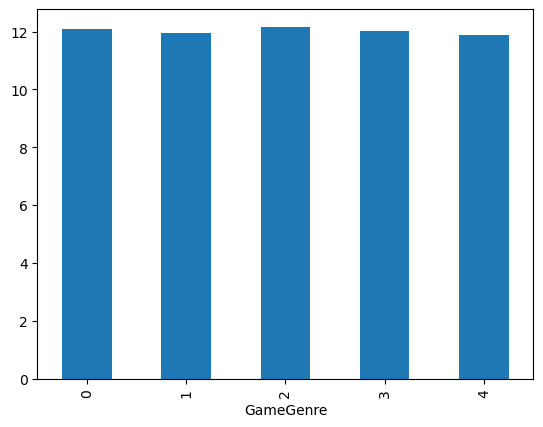

In [69]:
df["PlayTimeHours"].groupby(df.GameGenre).mean().plot(kind= "bar")

<Axes: xlabel='GameGenre'>

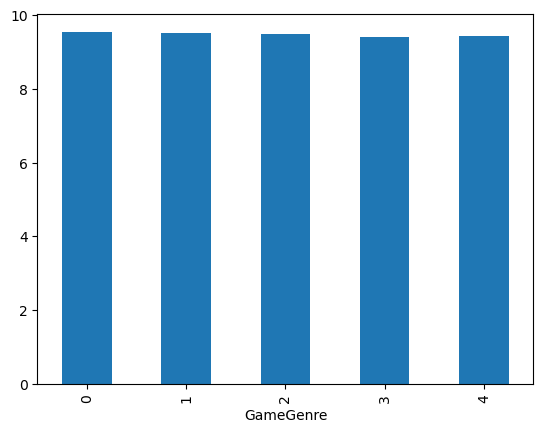

In [71]:
df["SessionsPerWeek"].groupby(df.GameGenre).mean().plot(kind= "bar")

<Axes: xlabel='GameGenre'>

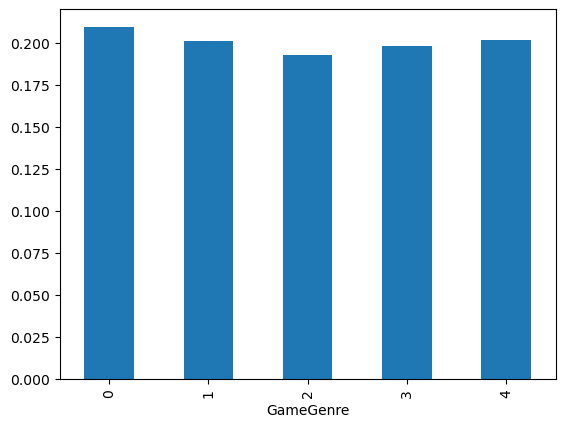

In [75]:
df["InGamePurchases"].groupby(df.GameGenre).mean().plot(kind= "bar")

<Axes: xlabel='GameGenre'>

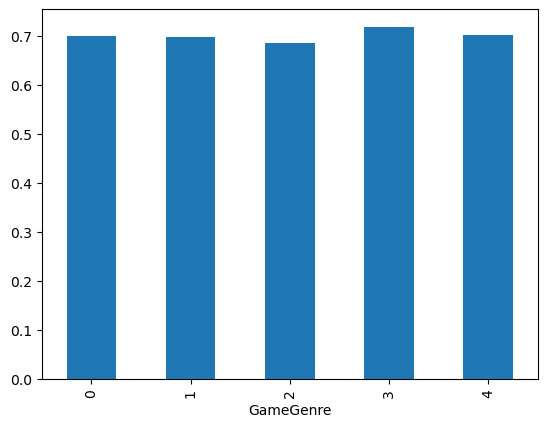

In [77]:
df["GameDifficulty"].groupby(df.GameGenre).mean().plot(kind= "bar")

<Axes: xlabel='GameGenre'>

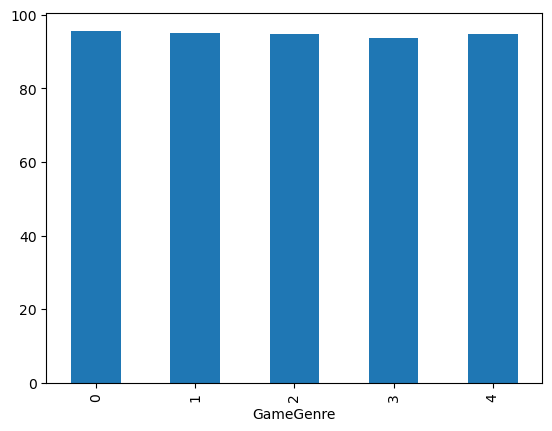

In [21]:
df["AvgSessionDurationMinutes"].groupby(df.GameGenre).mean().plot(kind= "bar")

In [35]:
df_corr = df.corr()

<Axes: >

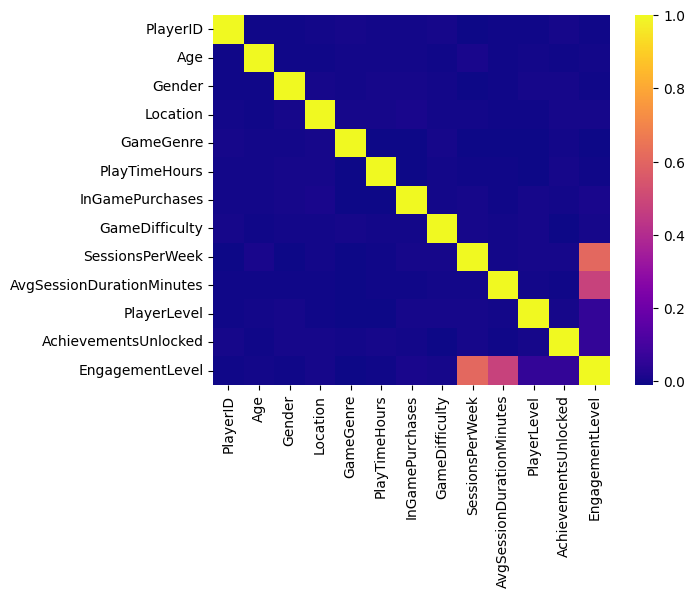

In [36]:
sns.heatmap(df_corr, cmap= "plasma")

After EDA, there is genuinely no correlation between the values, so attempting NN, to see if it picks up on anything

In [47]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,0,0,16.271119,0,1,6,108,79,25,1
1,9001,29,0,1,0,5.525961,0,1,5,144,11,10,1
2,9002,22,0,1,1,8.223755,0,0,16,142,35,41,2
3,9003,35,1,1,2,5.265351,1,0,9,85,57,47,1
4,9004,33,1,2,2,15.531945,0,1,2,131,95,37,1


In [48]:
X = df.drop(columns= ["GameGenre", "PlayerID"])

In [49]:
y = df["GameGenre"]
y.head()

,GameGenre
0,0
1,0
2,1
3,2
4,2


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 343)

In [51]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [60]:
model = Sequential([
    Dense(64, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dense(32, activation= "relu"),
    Dense(5, activation= "softmax")
])

model.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics= ["acc"])

In [61]:
hist = model.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 10
)

Epoch 1/10
939/939 [==============================] - 6s 4ms/step - loss: 1.6178 - acc: 0.2003 - val_loss: 1.6126 - val_acc: 0.2006
Epoch 2/10
939/939 [==============================] - 4s 4ms/step - loss: 1.6089 - acc: 0.2149 - val_loss: 1.6129 - val_acc: 0.1990
Epoch 3/10
939/939 [==============================] - 5s 6ms/step - loss: 1.6068 - acc: 0.2198 - val_loss: 1.6135 - val_acc: 0.2047
Epoch 4/10
939/939 [==============================] - 4s 4ms/step - loss: 1.6053 - acc: 0.2251 - val_loss: 1.6143 - val_acc: 0.2052
Epoch 5/10
939/939 [==============================] - 4s 4ms/step - loss: 1.6041 - acc: 0.2284 - val_loss: 1.6137 - val_acc: 0.2051
Epoch 6/10
939/939 [==============================] - 4s 4ms/step - loss: 1.6027 - acc: 0.2297 - val_loss: 1.6163 - val_acc: 0.2012
Epoch 7/10
939/939 [==============================] - 4s 4ms/step - loss: 1.6012 - acc: 0.2358 - val_loss: 1.6160 - val_acc: 0.2011
Epoch 8/10
939/939 [==============================] - 4s 4ms/step - loss: 1.

In [ ]:
y.shape

(40034,)

In [ ]:
y_hat = np.mean(y)

In [ ]:
np.sum((y_test - y_hat)**2) / len(y_test)

101.47560884409847

In [ ]:
np.sum(y_test - y_hat) / len(y_test)

0.04633367312676727

In [65]:
model.evaluate(X_test_sc, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6187 - acc: 0.1993


[1.6187083721160889, 0.19932061433792114]

In [63]:
model2 = Sequential([
    Dense(512, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dense(256, activation= "relu"),
    Dropout(0.5),
    Dense(128, activation= "relu"),
    Dropout(0.5),
    Dense(64, activation= "relu", kernel_regularizer= l1(0.1)),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.01)),
    Dense(5, activation= "softmax", kernel_regularizer= l1(0.001))
])

es = EarlyStopping(patience= 7)

model2.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics= ["acc"])

hist2 = model2.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 20,
    callbacks= [es]
)

Epoch 1/20
939/939 [==============================] - 8s 6ms/step - loss: 6.6398 - acc: 0.1994 - val_loss: 1.7112 - val_acc: 0.2015
Epoch 2/20
939/939 [==============================] - 5s 6ms/step - loss: 1.7116 - acc: 0.1993 - val_loss: 1.7121 - val_acc: 0.1980
Epoch 3/20
939/939 [==============================] - 6s 6ms/step - loss: 1.7115 - acc: 0.2001 - val_loss: 1.7126 - val_acc: 0.1968
Epoch 4/20
939/939 [==============================] - 5s 6ms/step - loss: 1.7115 - acc: 0.1989 - val_loss: 1.7134 - val_acc: 0.2015
Epoch 5/20
939/939 [==============================] - 5s 6ms/step - loss: 1.7116 - acc: 0.1985 - val_loss: 1.7111 - val_acc: 0.1968
Epoch 6/20
939/939 [==============================] - 6s 6ms/step - loss: 1.7115 - acc: 0.1995 - val_loss: 1.7106 - val_acc: 0.2015
Epoch 7/20
939/939 [==============================] - 5s 5ms/step - loss: 1.7115 - acc: 0.2007 - val_loss: 1.7108 - val_acc: 0.1980
Epoch 8/20
939/939 [==============================] - 5s 5ms/step - loss: 1.

In [64]:
model2.evaluate(X_test_sc, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7115 - acc: 0.1980


[1.7114536762237549, 0.1980217844247818]

In [66]:
X_gender = df.drop(columns= ["Gender", "PlayerID"])
y_gender = df["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X_gender, y_gender, random_state= 343)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [67]:
gender_model = Sequential([
    Dense(64, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dropout(0.5),
    Dense(64, activation= "relu"),
    Dropout(0.5),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.001)),
    Dense(1, activation= "sigmoid")
])

es = EarlyStopping(patience= 7)

gender_model.compile(loss= "bce", optimizer= "adam", metrics= ["acc"])

gender_hist = gender_model.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 20,
    callbacks= [es]
)

Epoch 1/20
939/939 [==============================] - 8s 7ms/step - loss: 0.7714 - acc: 0.5933 - val_loss: 0.7024 - val_acc: 0.5947
Epoch 2/20
939/939 [==============================] - 4s 5ms/step - loss: 0.6874 - acc: 0.5997 - val_loss: 0.6810 - val_acc: 0.5947
Epoch 3/20
939/939 [==============================] - 4s 5ms/step - loss: 0.6770 - acc: 0.5997 - val_loss: 0.6780 - val_acc: 0.5947
Epoch 4/20
939/939 [==============================] - 6s 6ms/step - loss: 0.6753 - acc: 0.5997 - val_loss: 0.6767 - val_acc: 0.5947
Epoch 5/20
939/939 [==============================] - 4s 5ms/step - loss: 0.6748 - acc: 0.5997 - val_loss: 0.6769 - val_acc: 0.5947
Epoch 6/20
939/939 [==============================] - 7s 8ms/step - loss: 0.6747 - acc: 0.5997 - val_loss: 0.6764 - val_acc: 0.5947
Epoch 7/20
 67/939 [=>............................] - ETA: 6s - loss: 0.6800 - acc: 0.5863

KeyboardInterrupt: 

In [68]:
gender_model2 = Sequential([
    Dense(512, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dense(256, activation= "relu"),
    Dropout(0.5),
    Dense(128, activation= "relu"),
    Dropout(0.5),
    Dense(64, activation= "relu", kernel_regularizer= l1(0.001)),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.01)),
    Dense(1, activation= "sigmoid")
])

es = EarlyStopping(patience= 7)

gender_model2.compile(loss= "bce", optimizer= "adam", metrics= ["acc"])

gender_hist2 = gender_model2.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 20,
    callbacks= [es]
)

Epoch 1/20
939/939 [==============================] - 7s 5ms/step - loss: 1.0056 - acc: 0.5986 - val_loss: 0.6784 - val_acc: 0.5947
Epoch 2/20
939/939 [==============================] - 6s 6ms/step - loss: 0.6764 - acc: 0.5997 - val_loss: 0.6783 - val_acc: 0.5947
Epoch 3/20
939/939 [==============================] - 5s 5ms/step - loss: 0.6764 - acc: 0.5997 - val_loss: 0.6784 - val_acc: 0.5947
Epoch 4/20
247/939 [======>.......................] - ETA: 3s - loss: 0.6786 - acc: 0.5946

KeyboardInterrupt: 

I cancelled the neural nets early, as they both stagnated from the beginning.

I attempted neural nets, but yielded no good results, they either stagnated from the get go, as shown with the gender models, or they performed than the baseline. This shows that either it is hard to predict these targets, or, that neural nets are insufficient for the task.

In [69]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,0,0,16.271119,0,1,6,108,79,25,1
1,9001,29,0,1,0,5.525961,0,1,5,144,11,10,1
2,9002,22,0,1,1,8.223755,0,0,16,142,35,41,2
3,9003,35,1,1,2,5.265351,1,0,9,85,57,47,1
4,9004,33,1,2,2,15.531945,0,1,2,131,95,37,1


<Axes: xlabel='Age', ylabel='PlayTimeHours'>

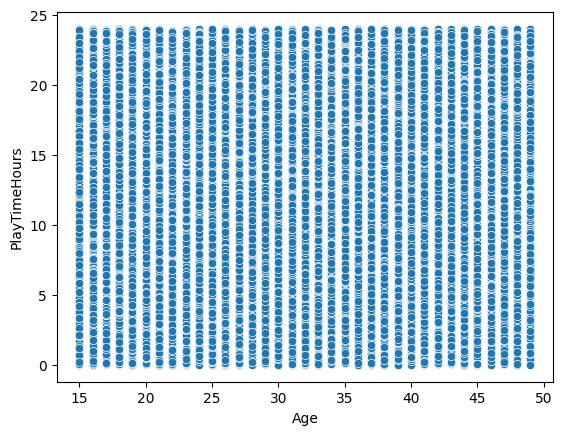

In [70]:
sns.scatterplot(df, x= "Age", y= "PlayTimeHours")

Whilst not all the data, shows that clustering may be pointless. So best approach it via tree modelling

In [ ]:
df.describe()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,0.598466,2.605960,2.996153,12.024365,0.200854,1.700080,9.471774,94.792252,49.655568,24.526477,2.000300
std,11556.964675,10.043227,0.490215,0.916397,1.413449,6.914638,0.400644,0.781053,5.763667,49.011375,28.588379,14.430726,0.718383
min,9000.000000,15.000000,0.000000,1.000000,1.000000,0.000115,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000,1.000000
25%,19008.250000,23.000000,0.000000,2.000000,2.000000,6.067501,0.000000,1.000000,4.000000,52.000000,25.000000,12.000000,1.000000
50%,29016.500000,32.000000,1.000000,3.000000,3.000000,12.008002,0.000000,2.000000,9.000000,95.000000,49.000000,25.000000,2.000000
75%,39024.750000,41.000000,1.000000,3.000000,4.000000,17.963831,0.000000,2.000000,14.000000,137.000000,74.000000,37.000000,3.000000
max,49033.000000,49.000000,1.000000,4.000000,5.000000,23.999592,1.000000,3.000000,19.000000,179.000000,99.000000,49.000000,3.000000


We can see that the data has no correlation or workable model so far, so I opted for tree models, as it seems classification might be the way to go here.

In [76]:
X = df.drop(columns= ["GameGenre", "PlayerID"])
y = df["GameGenre"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 343)

In [74]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.20091917274452992)

In [76]:
bagtree = DecisionTreeClassifier()
bag = BaggingClassifier(bagtree, n_estimators= 500, random_state= 343)

In [77]:
%%time
bag.fit(X_train, y_train)

CPU times: user 2min 10s, sys: 880 ms, total: 2min 11s
Wall time: 2min 13s


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=343)

In [78]:
bag.score(X_train, y_train)

1.0

In [79]:
bag.score(X_test, y_test)

0.1969227695074433

In [80]:
rf = RandomForestClassifier(n_estimators= 500, oob_score= True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True)

In [81]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.20111899290638424)

In [82]:
et = ExtraTreesClassifier(n_estimators= 500)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500)

In [83]:
et.score(X_train, y_train), et.score(X_test, y_test)

(1.0, 0.1992207013687681)

In [84]:
pipe = Pipeline([
    ("sc", StandardScaler()),
    ("pc", PCA()),
    ("lr", LogisticRegression(penalty= None))
    ])

pgrid = {"pc__n_components": np.arange(1, 12)}

gs = GridSearchCV(pipe, pgrid, cv=5)

In [85]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()), ('pc', PCA()),
                                       ('lr',
                                        LogisticRegression(penalty=None))]),
             param_grid={'pc__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [86]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.20692756036636137, 0.1989209711259866)

In [87]:
gs.best_params_

{'pc__n_components': 8}

In [88]:
lasso = Lasso()
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [89]:
lasso.fit(X_train_sc, y_train)

Lasso()

In [90]:
lasso.score(X_train_sc, y_train), lasso.score(X_test_sc, y_test)

(0.0, -0.00021163483178532339)

In [91]:
ridge_alphas = np.logspace(0, 10, 100)

In [92]:
ridge_cv = RidgeCV(alphas= ridge_alphas, cv= 5)

In [93]:
ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.32194115e+0...
       4.75081016e+07, 5.99484250e+07, 7.56463328e+07, 9.54548457e+07,
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
        cv=5)

In [94]:
ridge_cv.best_score_

-0.00033918359468123607

Tried regularising/feature selecting models to see if they worked better, but on the whole no.

It seems overall tree classifying models work the best all round, so we'll try to improve on that

In [95]:
tree_ada = DecisionTreeClassifier(max_depth= 1)
ada = AdaBoostClassifier(tree_ada, n_estimators= 500, algorithm= "SAMME.R")

In [96]:
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=500)

In [97]:
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.24306411323896754, 0.19762214007393347)

1 performed the best

In [91]:
gb = GradientBoostingClassifier(n_estimators= 500, max_depth= 1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=500)

In [92]:
gb.score(X_train, y_train), gb.score(X_test, y_test)

(0.23440466278101582, 0.19542411829353581)

Chris and I tried finding the best model and he seemed to have a slightly better one than me, I couldn't beat baseline in any of my models.